In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
from tqdm import tqdm
from scipy.interpolate import UnivariateSpline
from numpy.polynomial import chebyshev
from scipy import optimize
from math import pi

import sys
sys.path.append('../')
import unknown_utils

In [3]:
dir = "/home/gridsan/tmackey/cdvae/scripts/XRD_CDVAE/Freedman_Lab_Compounds/diffraction_for_Tsach"

In [10]:
import os

def rename_files(directory):
    # Define a mapping of old to new prefixes
    name_mapping = {
        'BaFeBiO': 'Fa_Ba_Fe_Bi_O',
        'RuBi': 'Fa_Ru_Bi',
        'TiBi': 'Fa_Ti_Bi',
        'WBi': 'Fa_W_Bi'
    }

    for filename in os.listdir(directory):
        if filename.endswith(".xy"):
            # Extract the prefix and the rest of the filename
            prefix, suffix = filename.split('_', 1)
            if prefix in name_mapping:
                new_filename = f"{name_mapping[prefix]}_{suffix}"
                old_path = os.path.join(directory, filename)
                new_path = os.path.join(directory, new_filename)
                os.rename(old_path, new_path)
                print(f"Renamed {filename} to {new_filename}")

rename_files(dir)

Renamed TiBi_2.xy to Fa_Ti_Bi_2.xy
Renamed WBi_11.xy to Fa_W_Bi_11.xy
Renamed RuBi_5.xy to Fa_Ru_Bi_5.xy
Renamed WBi_1.xy to Fa_W_Bi_1.xy
Renamed WBi_6.xy to Fa_W_Bi_6.xy
Renamed RuBi_6.xy to Fa_Ru_Bi_6.xy
Renamed BaFeBiO_6.xy to Fa_Ba_Fe_Bi_O_6.xy
Renamed WBi_7.xy to Fa_W_Bi_7.xy
Renamed BaFeBiO_5.xy to Fa_Ba_Fe_Bi_O_5.xy
Renamed RuBi_4.xy to Fa_Ru_Bi_4.xy
Renamed WBi_14.xy to Fa_W_Bi_14.xy
Renamed WBi_15.xy to Fa_W_Bi_15.xy
Renamed WBi_13.xy to Fa_W_Bi_13.xy
Renamed WBi_8.xy to Fa_W_Bi_8.xy
Renamed WBi_5.xy to Fa_W_Bi_5.xy
Renamed BaFeBiO_7.xy to Fa_Ba_Fe_Bi_O_7.xy
Renamed WBi_10.xy to Fa_W_Bi_10.xy
Renamed BaFeBiO_2.xy to Fa_Ba_Fe_Bi_O_2.xy
Renamed WBi_12.xy to Fa_W_Bi_12.xy
Renamed WBi_9.xy to Fa_W_Bi_9.xy
Renamed RuBi_1.xy to Fa_Ru_Bi_1.xy
Renamed BaFeBiO_8.xy to Fa_Ba_Fe_Bi_O_8.xy
Renamed RuBi_3.xy to Fa_Ru_Bi_3.xy
Renamed WBi_16.xy to Fa_W_Bi_16.xy
Renamed TiBi_1.xy to Fa_Ti_Bi_1.xy
Renamed BaFeBiO_3.xy to Fa_Ba_Fe_Bi_O_3.xy
Renamed WBi_2.xy to Fa_W_Bi_2.xy
Renamed BaFeBiO_1.xy 

In [6]:
dictionary_of_cifs = unknown_utils.stoichioemtry_extraction(dir)

Fa_Ti_Bi_2.xy
['Ti', 'Bi']
Fa_W_Bi_1.xy
['W', 'Bi']
Fa_W_Bi_12.xy
['W', 'Bi']
Fa_W_Bi_14.xy
['W', 'Bi']
Fa_W_Bi_2.xy
['W', 'Bi']
Fa_Ru_Bi_5.xy
['Ru', 'Bi']
Fa_W_Bi_17.xy
['W', 'Bi']
Fa_Ba_Fe_Bi_O_5.xy
['Ba', 'Fe', 'Bi', 'O']
Fa_W_Bi_15.xy
['W', 'Bi']
Fa_Ti_Bi_1.xy
['Ti', 'Bi']
Fa_Ba_Fe_Bi_O_1.xy
['Ba', 'Fe', 'Bi', 'O']
Fa_Ba_Fe_Bi_O_2.xy
['Ba', 'Fe', 'Bi', 'O']
Fa_Ru_Bi_4.xy
['Ru', 'Bi']
Fa_W_Bi_7.xy
['W', 'Bi']
pv_xrd_dict_0.pt
Fa_W_Bi_6.xy
['W', 'Bi']
Fa_Ru_Bi_1.xy
['Ru', 'Bi']
Fa_W_Bi_13.xy
['W', 'Bi']
Fa_W_Bi_8.xy
['W', 'Bi']
Fa_Ba_Fe_Bi_O_3.xy
['Ba', 'Fe', 'Bi', 'O']
Fa_Ru_Bi_6.xy
['Ru', 'Bi']
Fa_W_Bi_11.xy
['W', 'Bi']
Fa_W_Bi_16.xy
['W', 'Bi']
Fa_Ba_Fe_Bi_O_4.xy
['Ba', 'Fe', 'Bi', 'O']
Fa_Ba_Fe_Bi_O_7.xy
['Ba', 'Fe', 'Bi', 'O']
Fa_W_Bi_4.xy
['W', 'Bi']
Fa_W_Bi_3.xy
['W', 'Bi']
Fa_W_Bi_5.xy
['W', 'Bi']
Fa_Ru_Bi_2.xy
['Ru', 'Bi']
Fa_W_Bi_10.xy
['W', 'Bi']
Fa_Ba_Fe_Bi_O_6.xy
['Ba', 'Fe', 'Bi', 'O']
Fa_W_Bi_9.xy
['W', 'Bi']
Fa_Ba_Fe_Bi_O_8.xy
['Ba', 'Fe', 'Bi', 'O']
Fa_Ru_Bi_3.xy
['R

In [7]:
index = 2
keyvalue = list(dictionary_of_cifs.keys())[index]
print(keyvalue)
print(dictionary_of_cifs[keyvalue][0])

Fa_W_Bi_12.xy
# generated using pymatgen
data_BiW
_symmetry_space_group_name_H-M   'P 1'
_cell_length_a   4.06841964
_cell_length_b   4.06841964
_cell_length_c   4.06841964
_cell_angle_alpha   90.00000000
_cell_angle_beta   90.00000000
_cell_angle_gamma   90.00000000
_symmetry_Int_Tables_number   1
_chemical_formula_structural   BiW
_chemical_formula_sum   'Bi1 W1'
_cell_volume   67.34063789
_cell_formula_units_Z   1
loop_
 _symmetry_equiv_pos_site_id
 _symmetry_equiv_pos_as_xyz
  1  'x, y, z'
loop_
 _atom_site_type_symbol
 _atom_site_label
 _atom_site_symmetry_multiplicity
 _atom_site_fract_x
 _atom_site_fract_y
 _atom_site_fract_z
 _atom_site_occupancy
  W  W0  1  0.09273918  0.78040427  0.43405602  1
  Bi  Bi1  1  0.16313469  0.00875977  0.09128664  1



In [8]:
df = unknown_utils.create_dataframe(dictionary_of_cifs)

In [9]:
df

,cif,filename,material_id,formation_energy_per_atom,spacegroup.number,xrd_peak_intensities,xrd_peak_locations,disc_sim_xrd,atomic_numbers
0,# generated using pymatgen\ndata_TiBi\n_symmet...,Fa_Ti_Bi_2.xy,Fa_Ti_Bi_2_1x,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[22, 83]"
0,# generated using pymatgen\ndata_BiW\n_symmetr...,Fa_W_Bi_1.xy,Fa_W_Bi_1_1x,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[83, 74]"
0,# generated using pymatgen\ndata_BiW\n_symmetr...,Fa_W_Bi_12.xy,Fa_W_Bi_12_1x,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[83, 74]"
0,# generated using pymatgen\ndata_BiW\n_symmetr...,Fa_W_Bi_14.xy,Fa_W_Bi_14_1x,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[83, 74]"
0,# generated using pymatgen\ndata_BiW\n_symmetr...,Fa_W_Bi_2.xy,Fa_W_Bi_2_1x,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[83, 74]"
0,# generated using pymatgen\ndata_BiRu\n_symmet...,Fa_Ru_Bi_5.xy,Fa_Ru_Bi_5_1x,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[83, 44]"
0,# generated using pymatgen\ndata_BiW\n_symmetr...,Fa_W_Bi_17.xy,Fa_W_Bi_17_1x,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[83, 74]"
0,# generated using pymatgen\ndata_BaFeBiO\n_sym...,Fa_Ba_Fe_Bi_O_5.xy,Fa_Ba_Fe_Bi_O_5_1x,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[56, 26, 83, 8]"
0,# generated using pymatgen\ndata_BiW\n_symmetr...,Fa_W_Bi_15.xy,Fa_W_Bi_15_1x,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[83, 74]"
0,# generated using pymatgen\ndata_TiBi\n_symmet...,Fa_Ti_Bi_1.xy,Fa_Ti_Bi_1_1x,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[22, 83]"


In [10]:
unknown_utils.create_xrd_test_data(dir, df)

start index:  0
end index:  33
total length:  33


 15%|█▌        | 5/33 [00:00<00:03,  8.01it/s]

This model may perform poorly on data with a complicated background


 27%|██▋       | 9/33 [00:01<00:02, 11.60it/s]

This model may perform poorly on data with a complicated background
This model may perform poorly on data with a complicated background


 39%|███▉      | 13/33 [00:05<00:11,  1.71it/s]

This model may perform poorly on data with a complicated background
This model may perform poorly on data with a complicated background


 52%|█████▏    | 17/33 [00:05<00:04,  3.27it/s]

This model may perform poorly on data with a complicated background
This model may perform poorly on data with a complicated background


 64%|██████▎   | 21/33 [00:06<00:02,  5.48it/s]

This model may perform poorly on data with a complicated background
This model may perform poorly on data with a complicated background


 76%|███████▌  | 25/33 [00:06<00:00,  8.27it/s]

This model may perform poorly on data with a complicated background
This model may perform poorly on data with a complicated background


 88%|████████▊ | 29/33 [00:06<00:00, 10.56it/s]

This model may perform poorly on data with a complicated background
This model may perform poorly on data with a complicated background


100%|██████████| 33/33 [00:07<00:00,  4.70it/s]

This model may perform poorly on data with a complicated background
This model may perform poorly on data with a complicated background
This model may perform poorly on data with a complicated background


In [11]:
xrd_adjusted = torch.load(os.path.join(dir, "pv_xrd_dict_0.pt"))

In [20]:
pv_xrd_for_testing = unknown_utils.create_xrd_for_testing(xrd_adjusted, df)

Fa_Ti_Bi_2.xy
Fa_W_Bi_1.xy
Fa_W_Bi_12.xy
Fa_W_Bi_14.xy
Fa_W_Bi_2.xy
Fa_Ru_Bi_5.xy
Fa_W_Bi_17.xy
Fa_Ba_Fe_Bi_O_5.xy
Fa_W_Bi_15.xy
Fa_Ti_Bi_1.xy
Fa_Ba_Fe_Bi_O_1.xy
Fa_Ba_Fe_Bi_O_2.xy
Fa_Ru_Bi_4.xy
Fa_W_Bi_7.xy
Fa_W_Bi_6.xy
Fa_Ru_Bi_1.xy
Fa_W_Bi_13.xy
Fa_W_Bi_8.xy
Fa_Ba_Fe_Bi_O_3.xy
Fa_Ru_Bi_6.xy
Fa_W_Bi_11.xy
Fa_W_Bi_16.xy
Fa_Ba_Fe_Bi_O_4.xy
Fa_Ba_Fe_Bi_O_7.xy
Fa_W_Bi_4.xy
Fa_W_Bi_3.xy
Fa_W_Bi_5.xy
Fa_Ru_Bi_2.xy
Fa_W_Bi_10.xy
Fa_Ba_Fe_Bi_O_6.xy
Fa_W_Bi_9.xy
Fa_Ba_Fe_Bi_O_8.xy
Fa_Ru_Bi_3.xy


Fa_Ti_Bi_2.xy


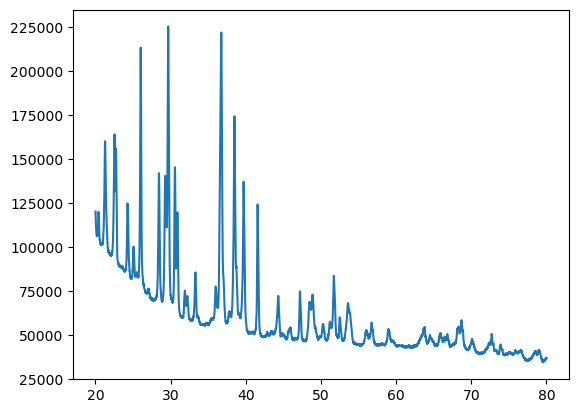

Fa_Ti_Bi_1.xy


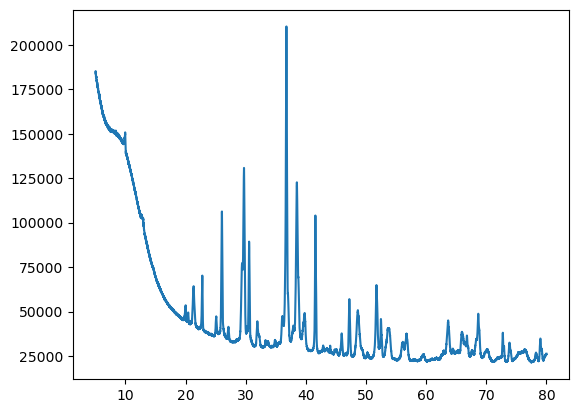

In [13]:
for filename in os.listdir(dir):
    if ".xy" in filename: 
        if "Ti" in filename: 
            #load in the original Ti_Bi data
            print(filename)
            ti_bi_1 = pd.read_csv(os.path.join(dir, filename))
            column_names = list(ti_bi_1.columns)
            plt.plot(ti_bi_1[column_names[0]], ti_bi_1[column_names[1]], label = filename)
            plt.show()

Fa_Ti_Bi_2_1x


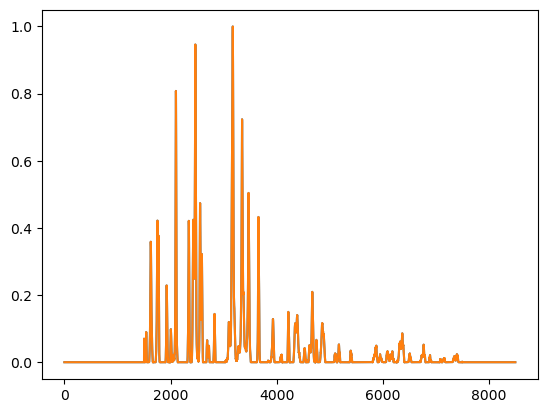



Fa_Ti_Bi_1_1x


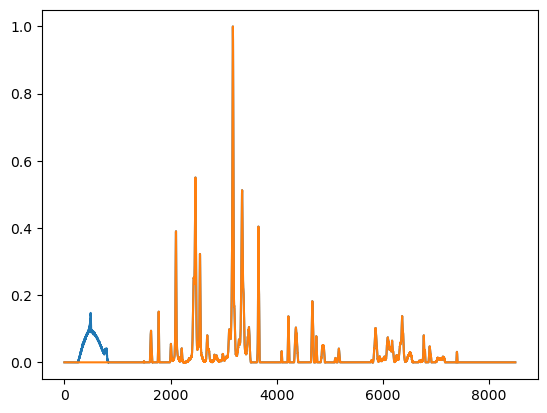

In [21]:
for i in range(len(list(pv_xrd_for_testing.keys()))):
    if "Ti_Bi" in list(pv_xrd_for_testing.keys())[i]:
        print(list(pv_xrd_for_testing.keys())[i])
        plt.plot(pv_xrd_for_testing[list(pv_xrd_for_testing.keys())[i]][0].numpy(), label = "before")
        if "Ti_Bi_1_1" in list(pv_xrd_for_testing.keys())[i]:
            pv_xrd_for_testing[list(pv_xrd_for_testing.keys())[i]][0][:1500] = 0
        plt.plot(pv_xrd_for_testing[list(pv_xrd_for_testing.keys())[i]][0].numpy(), label = "after")
        plt.show()
        print("\n")

In [22]:
final_directory = "/home/gridsan/tmackey/cdvae/data/Freedman_lab_diffraction_for_Tsach_newly_subtracted"

In [23]:
#save pv_xrds to /home/gridsan/tmackey/cdvae/data/Freedman_lab_full_subtraction as test_pv_xrd.pt
torch.save(pv_xrd_for_testing, os.path.join(final_directory, "test_pv_xrd.pt"))

#save df to /home/gridsan/tmackey/cdvae/data/Freedman_lab_full_subtraction as test.csv
df.to_csv(os.path.join(final_directory, "test.csv"))

In [24]:
unknown_utils.generate_and_save_graphs(final_directory)

  0%|          | 0/33 [00:00<?, ?it/s]

100%|██████████| 33/33 [00:00<00:00, 39.69it/s]
